In [1]:
# import seaborn as sns
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import pickle
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import re
# import nltk
# from nltk.corpus import stopwords

# # Download NLTK data (only required once)
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

# # Stopwords and lemmatizer
# stop_words = set(stopwords.words('english'))
# lemmatizer = nltk.WordNetLemmatizer()

# # Define preprocessing function
# def preprocess_text(text):
#     # Remove special characters and numbers
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize
#     tokens = nltk.word_tokenize(text)
#     # Remove stopwords and lemmatize
#     tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
#     # Rejoin tokens into a single string
#     return ' '.join(tokens)

# train_file_path = './data/train.csv'
# test_file_path = './data/test.csv'

# train_df = pd.read_csv(train_file_path)
# test_df = pd.read_csv(test_file_path)

# train_df.dropna(inplace=True)
# test_df.dropna(inplace=True)

# train_df['text'] = train_df['text'].apply(preprocess_text)
# test_df['text'] = test_df['text'].apply(preprocess_text)

# X = train_df['text']
# y = train_df['sentiment']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Vectorize text for classical models
# vectorizer = CountVectorizer(stop_words='english', max_features=5000)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_val_vec = vectorizer.transform(X_val)
# X_test_vec = vectorizer.transform(test_df['text'])

# # Prepare data for neural network
# max_vocab_size = 5000
# max_sequence_length = 100
# tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_val_seq = tokenizer.texts_to_sequences(X_val)
# X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
# X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# label_encoder = LabelEncoder()
# y_train_enc = label_encoder.fit_transform(y_train)
# y_val_enc = label_encoder.transform(y_val)

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_file_path = './data/train.csv'
test_file_path = './data/test.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

X = train_df['text']
y = train_df['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text for classical models
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df['text'])

# Prepare data for neural network
max_vocab_size = 5000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)

In [3]:
train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
print(train_df.shape)
print(test_df.shape)
train_df.info()

(27480, 4)
(3534, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [5]:
train_df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [6]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_val_pred_nb = nb_model.predict(X_val_vec)
nb_accuracy = accuracy_score(y_val, y_val_pred_nb)
# nb_report = classification_report(y_val, y_val_pred_nb)

print("Naive Bayes Accuracy:", nb_accuracy)
# print("Classification Report:", nb_report)

Naive Bayes Accuracy: 0.645924308588064


In [7]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_vec, y_train)

y_val_pred_log_reg = log_reg_model.predict(X_val_vec)
log_reg_accuracy = accuracy_score(y_val, y_val_pred_log_reg)
# log_reg_report = classification_report(y_val, y_val_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
# print("Classification Report:", log_reg_report)

Logistic Regression Accuracy: 0.6834061135371179


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vec, y_train)

y_val_pred_rf = rf_model.predict(X_val_vec)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
# rf_report = classification_report(y_val, y_val_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
# print("Classification Report:", rf_report)

Random Forest Accuracy: 0.6941411935953421


In [9]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

# model = Sequential([
#     Embedding(input_dim=max_vocab_size, output_dim=64),
#     GlobalAveragePooling1D(),
#     Dense(64, activation='relu'),
#     Dense(len(label_encoder.classes_), activation='softmax')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train_pad, y_train_enc, validation_data=(X_val_pad, y_val_enc), epochs=10, batch_size=32, verbose=1)

# val_loss, nn_accuracy = model.evaluate(X_val_pad, y_val_enc, verbose=0)
# print(f"Neural Network Validation Accuracy: {nn_accuracy}")

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_enc, validation_data=(X_val_pad, y_val_enc), epochs=10, batch_size=32, verbose=1)

val_loss, nn_accuracy = model.evaluate(X_val_pad, y_val_enc, verbose=0)
print(f"Improved Neural Network Validation Accuracy: {nn_accuracy}")

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5076 - loss: 1.0249 - val_accuracy: 0.5044 - val_loss: 1.1013
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7178 - loss: 0.6763 - val_accuracy: 0.4007 - val_loss: 1.6213
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7451 - loss: 0.6101 - val_accuracy: 0.6685 - val_loss: 0.8524
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7725 - loss: 0.5576 - val_accuracy: 0.5917 - val_loss: 1.2126
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7937 - loss: 0.5192 - val_accuracy: 0.5815 - val_loss: 0.8717
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8015 - loss: 0.4996 - val_accuracy: 0.3952 - val_loss: 2.1477
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8116 - loss: 0.4745 - val_accuracy: 0.6652 - val_loss: 1.1142
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8187 - loss: 0.4547 - val_accuracy: 0.

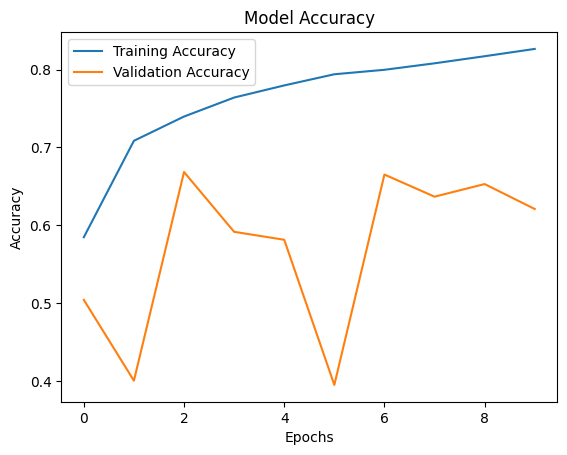

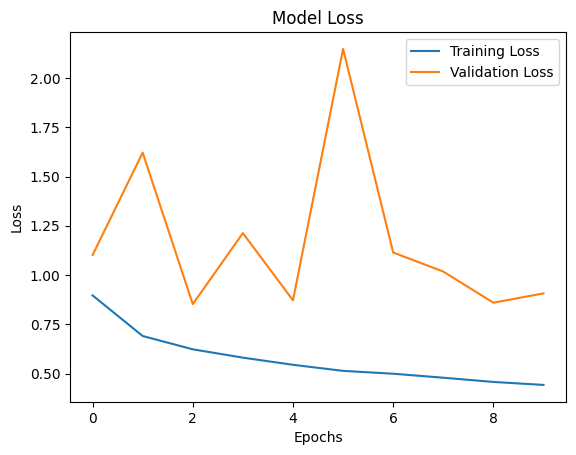

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

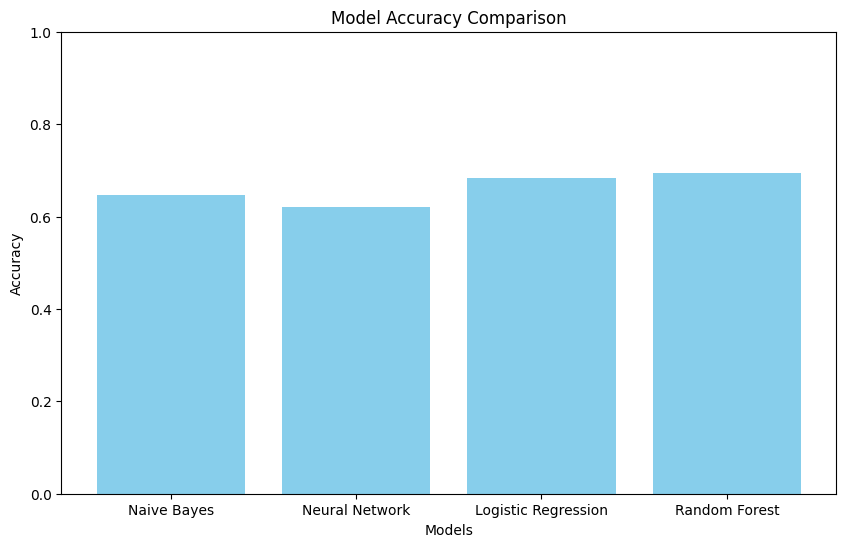

In [12]:
models = ['Naive Bayes', 'Neural Network', 'Logistic Regression', 'Random Forest']
accuracies = [nb_accuracy, nn_accuracy, log_reg_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


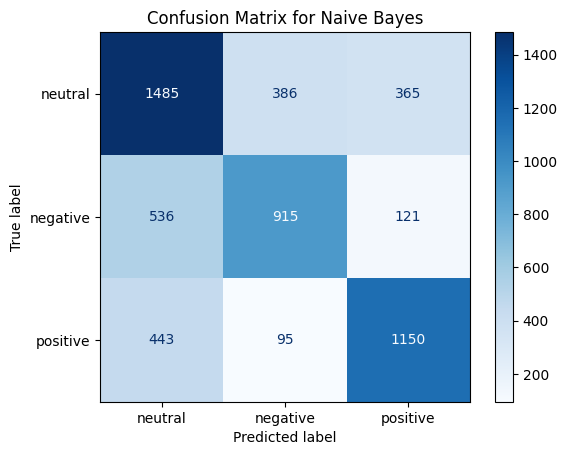

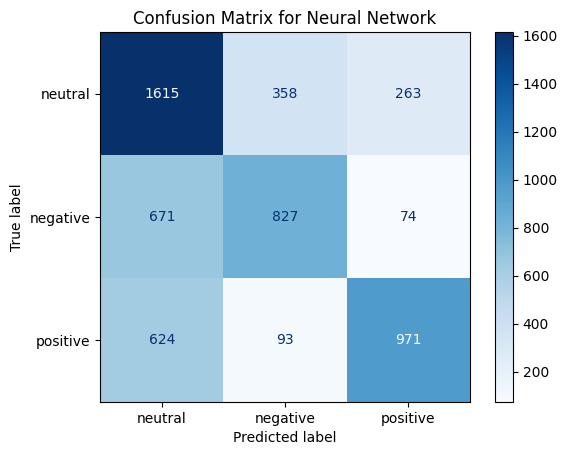

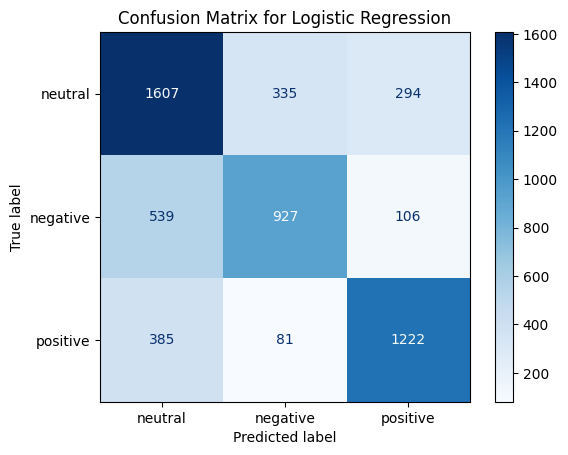

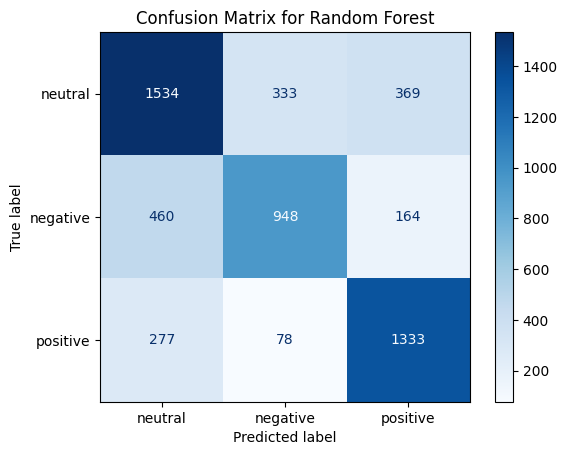

In [13]:
for model_name, y_pred in zip(
    models, 
    [y_val_pred_nb, label_encoder.inverse_transform(model.predict(X_val_pad).argmax(axis=1)), y_val_pred_log_reg, y_val_pred_rf]
):
    cm = confusion_matrix(y_val, y_pred, labels=y.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [14]:
model_save_path = '../webapp/instance/sentiment_analysis_nn_model.keras'
model.save(model_save_path)

tokenizer_save_path = '../webapp/instance/tokenizer.pkl'
with open(tokenizer_save_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f"Model and tokenizer saved to {model_save_path} and tokenizer.pkl")

Model and tokenizer saved to ../webapp/instance/sentiment_analysis_nn_model.keras and tokenizer.pkl


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

label_map = {'negative': 0, 'neutral': 1, 'positive': 2}

model_load_path = '../webapp/instance/sentiment_analysis_nn_model.keras'
loaded_model = load_model(model_load_path, compile=False)
print(f"Model loaded from {model_load_path}")

tokenizer_load_path = '../webapp/instance/tokenizer.pkl'
with open(tokenizer_load_path, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
print(f"Tokenizer loaded from {tokenizer_load_path}")

new_texts = ["This is a great product!", "I hated the experience."]
new_texts_seq = loaded_tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, maxlen=100, padding='post')

new_predictions = loaded_model.predict(new_texts_pad)
new_labels = [list(label_map.keys())[i] for i in new_predictions.argmax(axis=1)]
print("Predicted Sentiments:", new_labels)

Model loaded from ../webapp/instance/sentiment_analysis_nn_model.keras
Tokenizer loaded from ../webapp/instance/tokenizer.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Sentiments: ['positive', 'negative']
